## Number of Home Runs per season by every Champion

Obtain the number of HR’s per season for each year’s HR champion and show it in a bar chart per year. Stats recording started in 1871.

Obtener el número de HR’s por año de cada campeón de HR y ponerlo en una gráfica de barras por año. La recavación de estadísticas empezó en el año de 1871.

The set of databases can be found in this link. Consider it is a csv file. Find the Batting.csv data base in the Core folder.

https://github.com/chadwickbureau/baseballdatabank/tree/master/core


The raw data for the Batting data base is in

https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters used in the code. Change as needed
DATA_BASE_PATH = 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv'
START_YEAR = 2000
END_YEAR = 2022
COLUMNS_TO_EXTRACT = ['playerID', 'yearID', 'HR']

In [3]:
# Read the data base and construct a data frame with only the required columns
battingDbFrame = pd.read_csv(DATA_BASE_PATH)
hRStatsDf = battingDbFrame.loc[:, COLUMNS_TO_EXTRACT]
hRStatsDf.head()

,playerID,yearID,HR
0,abercda01,1871,0
1,addybo01,1871,0
2,allisar01,1871,0
3,allisdo01,1871,2
4,ansonca01,1871,0


In [4]:
# Iterate throught the HR Stats Data Frame and store every year's champions stats
championsDf = pd.DataFrame()
for i in range(START_YEAR, END_YEAR):
    condition1 = hRStatsDf.yearID == i
    currentYearDf = hRStatsDf.loc[condition1, COLUMNS_TO_EXTRACT]
    condition2 = hRStatsDf.HR == currentYearDf.HR.max()
    currentYearChampionDf = currentYearDf.loc[condition2, COLUMNS_TO_EXTRACT]
    championsDf = pd.concat([championsDf, currentYearChampionDf], ignore_index = True, axis = 0)

championsDf.head()

,playerID,yearID,HR
0,sosasa01,2000,50
1,bondsba01,2001,73
2,rodrial01,2002,57
3,rodrial01,2003,47
4,thomeji01,2003,47


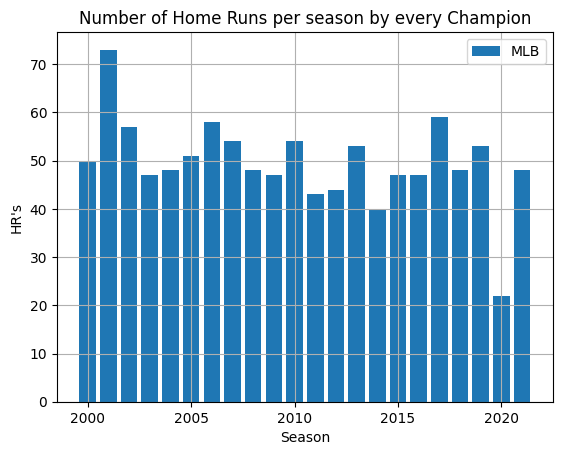

In [5]:
plt.bar(championsDf.yearID, championsDf.HR)
plt.title('Number of Home Runs per season by every Champion')
plt.xlabel('Season')
plt.ylabel('HR\'s')
plt.legend(['MLB'])
plt.grid()
plt.show()